In [4]:
from scipy.io import loadmat

In [9]:
m = loadmat('data/mnist-original.mat')

In [11]:
m

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [14]:
import pandas as pd

In [15]:
m.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])

In [16]:
 m['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
X = pd.DataFrame(m['data'])

In [18]:
y= m['label']

In [23]:
X1=X.T

In [26]:
X1.shape

(70000, 784)

In [25]:
y1=y.T

In [27]:
y1.shape

(70000, 1)

In [40]:
some_digit = X[36000]

In [70]:
X1[:6000]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
some_digit.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 36000, Length: 784, dtype: uint8>

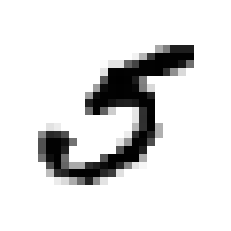

In [34]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [38]:
y1[3600]

array([0.])

In [76]:
X_train, X_test, y_train, y_test = X1[:60000].values,X1[60000:].values, y[:60000], y[60000:]

In [78]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [79]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [80]:
y_train

array([6., 7., 3., ..., 9., 5., 9.])

In [81]:
y_train_5 = (y_train == 5) 

In [82]:
y_train_5

array([False, False, False, ..., False,  True, False])

In [83]:
y_test_5 = (y_test == 5)

In [84]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
 sgd_clf.predict([some_digit.values])

array([ True])

In [86]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

e:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95975
0.96435
0.95415


In [87]:
>>> from sklearn.model_selection import cross_val_score
>>> cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95975, 0.96435, 0.95415])

In [92]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [104]:
y_train_pred.shape

(60000,)

In [94]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(y_train_5, y_train_pred)

array([[53052,  1527],
       [  908,  4513]], dtype=int64)

In [95]:
 from sklearn.metrics import precision_score, recall_score

In [127]:
precision_score(y_train_5, y_train_pred)

0.7471854304635761

In [126]:
recall_score(y_train_5, y_train_pred)

0.8325032281866814

In [102]:
from sklearn.metrics import f1_score

In [103]:
f1_score(y_train_5, y_train_pred)

0.7875403542448304

In [105]:
some_digit

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 36000, Length: 784, dtype: uint8

In [106]:
y_scores = sgd_clf.decision_function([some_digit])

In [107]:
y_scores

array([2451.15913408])

In [108]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                            method="decision_function")

In [116]:
y_scores

array([-38452.26930799,  -1704.61944469, -25130.13427964, ...,
       -30070.14756108,   7874.11608109, -18559.60927526])

In [109]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

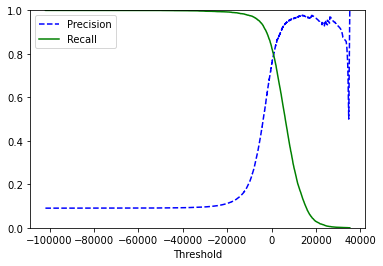

In [110]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [111]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

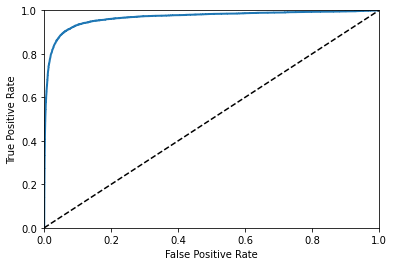

In [112]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [113]:
>>> from sklearn.metrics import roc_auc_score
>>> roc_auc_score(y_train_5, y_scores)

0.9669759763182523

In [117]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [120]:
y_probas_forest

array([[0.99, 0.01],
       [0.97, 0.03],
       [0.91, 0.09],
       ...,
       [0.97, 0.03],
       [0.04, 0.96],
       [1.  , 0.  ]])

In [121]:
y_scores_forest = y_probas_forest[:, 1] 

In [134]:
y_scores_forest

array([0.01, 0.03, 0.09, ..., 0.03, 0.96, 0.  ])

In [123]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


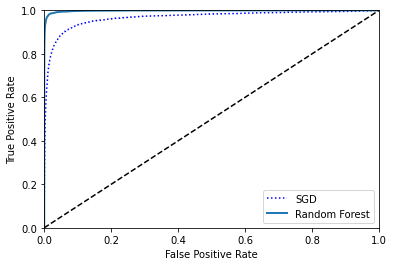

In [124]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [125]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983638084775489

In [136]:
y_scores_forest>=0.5

array([False, False, False, ..., False,  True, False])

In [137]:
precision_score(y_train_5, y_scores_forest>=0.5)

0.9891531080517313

In [138]:
recall_score(y_train_5, y_scores_forest>=0.5)

0.8747463567607453

In [139]:
some_digit

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 36000, Length: 784, dtype: uint8

In [140]:
>>> sgd_clf.fit(X_train, y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [141]:
>>> some_digit_scores = sgd_clf.decision_function([some_digit])
>>> some_digit_scores

array([[ -2994.15894454, -26799.65225245, -10857.54781978,
         -3705.19709396, -15212.47705034,   3376.31287554,
        -32752.68996304, -12687.37842493, -11773.43603511,
        -23148.91398869]])

In [144]:
np.argmax(some_digit_scores)

5

In [145]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [146]:
>>> forest_clf.fit(X_train, y_train)
>>> forest_clf.predict([some_digit])

array([5.])

In [147]:
forest_clf.predict_proba([some_digit])

array([[0.03, 0.  , 0.01, 0.08, 0.  , 0.85, 0.  , 0.02, 0.01, 0.  ]])

In [148]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87215, 0.8813 , 0.86105])

In [149]:
>>> from sklearn.preprocessing import StandardScaler
>>> scaler = StandardScaler()
>>> X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [150]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [156]:
 cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

e:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9005 , 0.90365, 0.90255])

In [157]:
>>> y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
>>> conf_mx = confusion_matrix(y_train, y_train_pred)

e:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [158]:
conf_mx

array([[5605,    0,   16,    6,    8,   45,   34,    6,  202,    1],
       [   1, 6417,   47,   21,    3,   39,    5,   10,  186,   13],
       [  27,   27, 5253,   85,   73,   25,   68,   39,  349,   12],
       [  29,   18,  117, 5261,    0,  207,   23,   40,  371,   65],
       [  12,   16,   44,   12, 5235,    7,   37,   16,  297,  166],
       [  30,   17,   30,  157,   55, 4507,   74,   13,  466,   72],
       [  28,   19,   50,    3,   45,   90, 5536,    8,  139,    0],
       [  20,   15,   51,   24,   45,   14,    6, 5714,  157,  219],
       [  18,   62,   44,   87,    3,  133,   28,    7, 5422,   47],
       [  23,   25,   27,   56,  121,   35,    1,  166,  311, 5184]],
      dtype=int64)

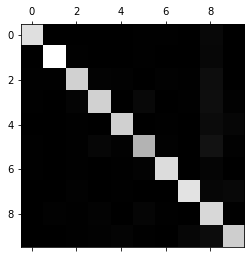

In [159]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [160]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [161]:
norm_conf_mx

array([[9.46310991e-01, 0.00000000e+00, 2.70133378e-03, 1.01300017e-03,
        1.35066689e-03, 7.59750127e-03, 5.74033429e-03, 1.01300017e-03,
        3.41043390e-02, 1.68833361e-04],
       [1.48323939e-04, 9.51794720e-01, 6.97122516e-03, 3.11480273e-03,
        4.44971818e-04, 5.78463364e-03, 7.41619697e-04, 1.48323939e-03,
        2.75882527e-02, 1.92821121e-03],
       [4.53172205e-03, 4.53172205e-03, 8.81671702e-01, 1.42665324e-02,
        1.22524337e-02, 4.19603894e-03, 1.14132259e-02, 6.54582075e-03,
        5.85767036e-02, 2.01409869e-03],
       [4.73006035e-03, 2.93589953e-03, 1.90833469e-02, 8.58098190e-01,
        0.00000000e+00, 3.37628446e-02, 3.75142717e-03, 6.52422117e-03,
        6.05121514e-02, 1.06018594e-02],
       [2.05409106e-03, 2.73878809e-03, 7.53166724e-03, 2.05409106e-03,
        8.96097227e-01, 1.19821979e-03, 6.33344745e-03, 2.73878809e-03,
        5.08387539e-02, 2.84149264e-02],
       [5.53403431e-03, 3.13595278e-03, 5.53403431e-03, 2.89614462e-02,
   

In [162]:
np.fill_diagonal(norm_conf_mx, 0)

In [163]:
norm_conf_mx

array([[0.        , 0.        , 0.00270133, 0.001013  , 0.00135067,
        0.0075975 , 0.00574033, 0.001013  , 0.03410434, 0.00016883],
       [0.00014832, 0.        , 0.00697123, 0.0031148 , 0.00044497,
        0.00578463, 0.00074162, 0.00148324, 0.02758825, 0.00192821],
       [0.00453172, 0.00453172, 0.        , 0.01426653, 0.01225243,
        0.00419604, 0.01141323, 0.00654582, 0.0585767 , 0.0020141 ],
       [0.00473006, 0.0029359 , 0.01908335, 0.        , 0.        ,
        0.03376284, 0.00375143, 0.00652422, 0.06051215, 0.01060186],
       [0.00205409, 0.00273879, 0.00753167, 0.00205409, 0.        ,
        0.00119822, 0.00633345, 0.00273879, 0.05083875, 0.02841493],
       [0.00553403, 0.00313595, 0.00553403, 0.02896145, 0.01014573,
        0.        , 0.01365062, 0.00239808, 0.085962  , 0.01328168],
       [0.00473133, 0.00321054, 0.0084488 , 0.00050693, 0.00760392,
        0.01520784, 0.        , 0.00135181, 0.02348766, 0.        ],
       [0.00319234, 0.00239425, 0.0081404

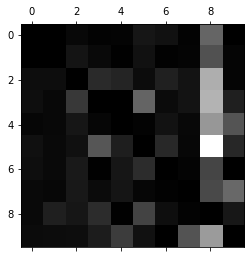

In [164]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [165]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [169]:
y_multilabel

array([[False, False],
       [ True,  True],
       [False,  True],
       ...,
       [ True,  True],
       [False,  True],
       [ True,  True]])

In [170]:
 knn_clf.predict([some_digit])

array([[False,  True]])

In [177]:
from  numpy import random as rnd

In [183]:
noise1 = rnd.randint(0, 100, (len(X_train), 784))

In [184]:
noise1

array([[72, 55, 37, ..., 46, 23, 36],
       [ 6, 90, 55, ..., 32, 35, 12],
       [36, 12,  7, ..., 81, 44, 63],
       ...,
       [44, 87, 47, ..., 74, 59, 58],
       [12, 63, 44, ..., 61, 52, 82],
       [11, 16, 83, ..., 70, 45, 87]])

In [185]:
noise2 = rnd.randint(0, 100, (len(X_test), 784))


In [186]:
noise2

array([[97, 34, 71, ..., 86, 88, 38],
       [23, 19, 25, ..., 74, 57, 92],
       [78,  1, 97, ..., 56, 25, 92],
       ...,
       [32,  3, 42, ..., 27, 91, 67],
       [71, 26, 79, ..., 68, 63, 32],
       [17, 17, 76, ..., 74, 90, 90]])

In [187]:
X_train_mod = X_train + noise1
X_test_mod = X_test + noise2
y_train_mod = X_train
y_test_mod = X_test

In [192]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [195]:
plot_digits(y_train_mod)

In [189]:
X_train_mod

array([[72, 55, 37, ..., 46, 23, 36],
       [ 6, 90, 55, ..., 32, 35, 12],
       [36, 12,  7, ..., 81, 44, 63],
       ...,
       [44, 87, 47, ..., 74, 59, 58],
       [12, 63, 44, ..., 61, 52, 82],
       [11, 16, 83, ..., 70, 45, 87]])

In [190]:
y_train_mod

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)